# Tổng Quan Các Loại JOIN Trong SQL

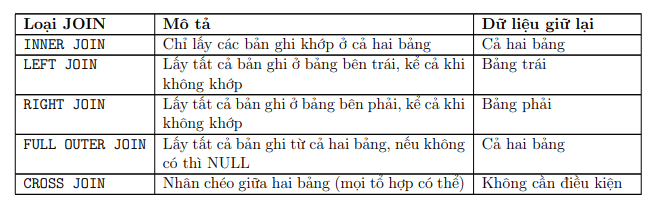

In [8]:
import pymysql
import os
from dotenv import load_dotenv

# Load environment variables from .credential file
load_dotenv("../../w7/.credential")

# Get credentials from environment variables
conn = pymysql.connect(
    host=os.getenv("DB_HOST"),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD")
)
cursor = conn.cursor()


In [18]:
cursor.execute("CREATE DATABASE IF NOT EXISTS w9db;")
cursor.execute("USE w9db;")

# 1. Tạo bảng Customers
cursor.execute("""
CREATE TABLE IF NOT EXISTS Customers1 (
    CustomerID INT PRIMARY KEY,
    Name VARCHAR(20) NOT NULL,
    City VARCHAR(20) NOT NULL
);
""")

# 2. Tạo bảng Accounts
cursor.execute("""
CREATE TABLE IF NOT EXISTS Accounts (
    AccountID VARCHAR(20) PRIMARY KEY,
    CustomerID INT NOT NULL,
    Balance INT NOT NULL
);
""")

# Thêm dữ liệu vào bảng Customers
cursor.execute("""
INSERT INTO Customers1 (CustomerID, Name, City) VALUES
(1, 'Alice', 'Hanoi'),
(2, 'Bob', 'HCM'),
(3, 'Charlie', 'Danang'),
(4, 'Diana', 'Hanoi')
;
""")

# Thêm dữ liệu vào bảng Accounts
cursor.execute("""
INSERT INTO Accounts (AccountID, CustomerID, Balance) VALUES
('A1', 1, 500),
('A2', 1, 1000),
('A3', 2, 1500),
('A4', 5, 300)
;
""")

# Commit the changes
conn.commit()

## 1. Viết truy vấn liệt kê tất cả khách hàng và các tài khoản nếu có.


In [19]:
# 1. Viết truy vấn liệt kê tất cả khách hàng và các tài khoản nếu có.

cursor.execute("""
SELECT c.name, a.accountid
FROM customers1 c
INNER JOIN accounts a
    ON c.customerid = a.customerid;
""")

data = cursor.fetchall()
print(data)

(('Alice', 'A1'), ('Alice', 'A2'), ('Bob', 'A3'))


## 2. Viết truy vấn chỉ hiển thị khách hàng có ít nhất một tài khoản.


In [20]:
# 2. Viết truy vấn chỉ hiển thị khách hàng có ít nhất một tài khoản.

cursor.execute("""
SELECT c.name, COUNT(a.customerid)
    AS account_nums
FROM customers1 c
LEFT JOIN accounts a
    ON c.customerid = a.customerid
GROUP BY c.name
HAVING account_nums > 0;
""")

data = cursor.fetchall()
print(data)

(('Alice', 2), ('Bob', 1))


## 3. Viết truy vấn hiển thị tất cả tài khoản, kể cả không biết thuộc khách hàng nào.


In [21]:
# 3. Viết truy vấn hiển thị tất cả tài khoản, kể cả không biết thuộc khách hàng nào.

cursor.execute("""
SELECT c.name, a.accountid, a.balance
FROM customers1 c
RIGHT JOIN accounts a
    ON c.customerid = a.customerid;
""")

data = cursor.fetchall()
print(data)

(('Alice', 'A1', 500), ('Alice', 'A2', 1000), ('Bob', 'A3', 1500), (None, 'A4', 300))


## 4. Viết truy vấn liệt kê toàn bộ kết hợp giữa khách hàng và tài khoản (mọi tổ hợp).


In [22]:
# 4. Viết truy vấn liệt kê toàn bộ kết hợp giữa khách hàng và tài khoản (mọi tổ hợp).

cursor.execute("""
SELECT c.name, a.accountid, a.balance
FROM customers1 c
CROSS JOIN accounts a;
""")

data = cursor.fetchall()
print(data)

(('Diana', 'A1', 500), ('Charlie', 'A1', 500), ('Bob', 'A1', 500), ('Alice', 'A1', 500), ('Diana', 'A2', 1000), ('Charlie', 'A2', 1000), ('Bob', 'A2', 1000), ('Alice', 'A2', 1000), ('Diana', 'A3', 1500), ('Charlie', 'A3', 1500), ('Bob', 'A3', 1500), ('Alice', 'A3', 1500), ('Diana', 'A4', 300), ('Charlie', 'A4', 300), ('Bob', 'A4', 300), ('Alice', 'A4', 300))


## 5. Tìm khách hàng không có tài khoản.


In [23]:
# 5. Tìm khách hàng không có tài khoản.

cursor.execute("""
SELECT c.name, a.accountid
FROM customers1 c
LEFT JOIN accounts a
    ON c.customerid = a.customerid
WHERE a.accountid IS NULL;
""")

data = cursor.fetchall()
print(data)

(('Charlie', None), ('Diana', None))


## 6. Tìm tài khoản không thuộc khách hàng nào.


In [24]:
# 6. Tìm tài khoản không thuộc khách hàng nào.

cursor.execute("""
SELECT c.name, a.accountid
FROM customers1 c
RIGHT JOIN accounts a
    ON c.customerid = a.customerid
WHERE c.name IS NULL;
""")

data = cursor.fetchall()
print(data)

((None, 'A4'),)


In [25]:
# Close Connection
cursor.close()
conn.close()